# Final project for the ***AASD*** exam (Analysis of Algorithm and Data structure), A.Y. 2022-2023

## **Alessio Santoro** - 7029440 alessio.santoro@stud.unifi.it

The target of the present elaborate is to analyze the paper [__"Two New Identities Involving the Catalan
Numbers and Sign-Reversing Involutions"__](https://cs.uwaterloo.ca/journals/JIS/VOL22/Mikic/mikic43.html) written by Jovan Mikić
#### Technical notes:
* The scripts presented in this elaboarte are being realized with with *Python (3.9.13)* and with the upport of the library *sympy*

In [2]:
from sympy import init_printing
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

init_printing()

## Introduction
### Catalan's number
Let $n$ b a non negative integer:$$C_n=\frac{1}{n+1}\left(\begin{array}{c}2n\\n\end{array}\right)$$
## Teorema 
*Let $n$ b a non negative integer, we have:*
1. $$ \sum_{k=0}^n(-1)^k\left(\begin{array}{c}n\\k\end{array}\right)C_k\left(\begin{array}{c}2n-2k\\n-k\end{array}\right)=\left(\begin{array}{c}n\\\lfloor\frac{n}{2}\rfloor\end{array}\right)^2\label{eq:1}$$ <br>

In [4]:
from sympy import binomial, catalan, Lambda, symbols, summation
from math import floor, pow, e
from random import randint 

def expr1L(n):
    k = symbols("k")
    return summation(
        (-1)**k*binomial(n, k)*catalan( k )*binomial(2*n - 2*k, n - k),(k,0,n))

def expr1R(n):
    return binomial(n,floor(n/2))**2

# Some numeric examples of the equivalence are shown: 
for i in [0,1,2, 5, 10, randint(1,50), randint(1,100)]:
    assert expr1L(i)==expr1R(i)
    print("n={}:\n\t{}={}\n".format(i,expr1L(i),expr1R(i)))

n=0:
	1=1

n=1:
	1=1

n=2:
	4=4

n=5:
	100=100

n=10:
	63504=63504

n=38:
	1249287673091590440000=1249287673091590440000

n=17:
	590976100=590976100



2. $$\sum_{k=0}^{2n}(-1)^k\left(\begin{array}{c}2n\\k\end{array}\right)C_kC_{2n-k}=C_n\left(\begin{array}{c}2n\\n\end{array}\right)$$

In [5]:
def expr2L(n):
    k = symbols("k")
    return summation((-1)**k*binomial(2*n,k)*catalan(k)*catalan(2*n-k),(k, 0, 2*n))

def expr2R(n):
    return catalan(n)*binomial(2*n,n)

# Some numeric examples of the equivalence are shown: 
for i in [0,1,2, 5, 10, randint(1,50), randint(1,100)]:
    assert expr2L(i)==expr2R(i) 
    print("n={}:\n\t{}={}\n".format(i,expr2L(i),expr2R(i)))

n=0:
	1=1

n=1:
	2=2

n=2:
	12=12

n=5:
	10584=10584

n=10:
	3103161776=3103161776

n=49:
	12982174528379432845233188860030829741439798406793959200=12982174528379432845233188860030829741439798406793959200

n=25:
	614601593075393361040415904=614601593075393361040415904



## Proof:
### Signs to the formal proof, presented in the article
In oder to prove the theorem, we're gonns use the following expression:
3. $$\sum_{k=0}^n(-1)^k\left(\begin{array}{c}n\\k\end{array}\right)\left(\begin{array}{c}2k\\k\end{array}\right)\left(\begin{array}{c}2n-2k\\n-k\end{array}\right)=\begin{cases}0&se\;n\;\;è\;dispari\\\left(\begin{array}{c}n\\\frac{n}{2}\end{array}\right)^2&se\;n\;è\;pari\end{cases}$$

In [6]:
def expr3(n):
        k = symbols("k")
        return summation((((-1)**k)*binomial(n,k)*binomial(2*k,k)*binomial(2*n-2*k,n-k)),(k,0,n))

# The results for some values are shown, for odd n, 0 is expected:
print("Odd vaules results:")
for i in range(5):
    n = 2*randint(1,25)+1 #generating odd numbers
    assert expr3(n)==0
    print ("n={}\tresult:{}".format(n,expr3(n)))


print("\n\nEven values results:")
for i in range(5):
    n = 2*randint(1,10)
    print ("n={} \n\tExpected:{}\n\tActual:{}".format(n,expr3(n),pow(binomial(n,n/2),2)))
    

Odd vaules results:
n=45	result:0
n=7	result:0
n=19	result:0
n=35	result:0
n=43	result:0


Even values results:
n=14 
	Expected:11778624
	Actual:11778624.0
n=14 
	Expected:11778624
	Actual:11778624.0
n=18 
	Expected:2363904400
	Actual:2363904400.0000005
n=6 
	Expected:400
	Actual:400.0
n=2 
	Expected:4
	Actual:4.0


By using the same idea, we derive the *−1 shifted version* of Eq. (3). We assert that:<br><br>
4. $$\sum_{k=0}^n(-1)^k\left(\begin{array}{c}n\\k\end{array}\right)\left(\begin{array}{c}2k\\k-1\end{array}\right)\left(\begin{array}{c}2n-2k\\n-k\end{array}\right)=\begin{cases}-\left(\begin{array}{c}n\\\lfloor\frac{n}{2}\rfloor\end{array}\right)^2&se\;n\;\;è\;dispari\\0&se\;n\;è\;pari\end{cases}$$

In [7]:
from math import floor

def expr4(n):
        k = symbols("k")
        return summation((((-1)**k)*binomial(n,k)*binomial(2*k,k-1)*binomial(2*n-2*k,n-k)),(k,0,n))

# he results for some values are shown, for even n, 0 is expected:
print("Even values results:")
for i in range(5):
    n = 2*randint(1,50)
    assert expr4(n)==0
    print ("n={}\tresult:{}".format(n,expr4(n)))


print("\n\nOdd values results ")
for i in range(5):
    n = 2*randint(1,10)+1
    print ("n={} \n\texpected:{}\n\tactual:{}".format(n,expr4(n),-pow(binomial(n,floor(n/2)),2)))
    

Even values results:
n=98	result:0
n=54	result:0
n=98	result:0
n=16	result:0
n=36	result:0


Odd values results 
n=17 
	expected:-590976100
	actual:-590976100.0
n=7 
	expected:-1225
	actual:-1225.0
n=17 
	expected:-590976100
	actual:-590976100.0
n=11 
	expected:-213444
	actual:-213444.0
n=13 
	expected:-2944656
	actual:-2944656.0


Clearly, subtracting Eq. (4) from Eq. (3) and by using the well-known relation $C_k=\left(\begin{array}{c}2k\\k\end{array}\right)-\left(\begin{array}{c}2k\\k-1\end{array}\right)$ we get the (1)<br>Furthermore it can be shown that (2) is a consequence of (1)

In [9]:
# showing numerically the equation 
for i in range(5):
    n = randint(1,50)
    print("n={}\n\t atteso:{}\n\t (3)-(4)={}".format(n,(expr3(n)-expr4(n)),pow(binomial(n,floor(n/2)),2)))

n=2
	 atteso:4
	 (3)-(4)=4.0
n=20
	 atteso:34134779536
	 (3)-(4)=34134779536.0
n=11
	 atteso:213444
	 (3)-(4)=213444.0
n=50
	 atteso:15979641419960227387050813504
	 (3)-(4)=1.5979641419960227e+28
n=50
	 atteso:15979641419960227387050813504
	 (3)-(4)=1.5979641419960227e+28


# Dimostrazione espressione (3)
### Mediante il metodo simbolico
Si vuole dimostrare che vale:
$$\sum_{k=0}^n(-1)^k\left(\begin{array}{c}n\\k\end{array}\right)\left(\begin{array}{c}2k\\k\end{array}\right)\left(\begin{array}{c}2n-2k\\n-k\end{array}\right)=\begin{cases}0&se\;n\;\;è\;dispari\\\left(\begin{array}{c}n\\\frac{n}{2}\end{array}\right)^2&se\;n\;è\;pari\end{cases}$$
Dall' espressione dei numeri di Catalan data all'inizio dell'elaborato, si ottiene la segunte relazione:
$$\left(\begin{array}{c}2k\\ k\end{array}\right)=(k+1)C_k$$
Con essa e con la definzione di coefficiente binomiale si può riscrivere l'equazione precedente come:
$$\sum_{k=0}^{n}(-1)^k\frac{n!}{k!(n-k!)}(k+1)C_k(n-k+1)C_{n-k}=\begin{cases}0&se\;n\;\;è\;dispari\\\frac{n!^2}{\left(\frac{n!}{2}\right)^4}&se\;n\;è\;pari\end{cases}$$
Nell'espressione a sinistra dell'uguale si possono dividere i membri che dipendono da $k$ da quelli che dipendono da $(n-k)$, inoltre il termine $n!$  può essere portato fuori dalla sommatoria e diviso:
$$\sum_{k=0}^{n}\frac{(-1)^kC_k(k+1)}{k!}\cdot\frac{C_{n-k}(n-k-1)}{(n-k)!}=\begin{cases}0&se\;n\;dispari\\\frac{\left(\begin{array}{c}n\\\frac{n}{2}\end{array}\right)^2}{n!}&se\;n\;pari\end{cases}$$
Si definisce la sequenza $a_n=\frac{C_n(n+1)}{n!}$ e si applica l'identità dei coefficienti binomiali centrali alla parte destra dell'equazione:
$$\frac{\left(\begin{array}{c}n\\\frac{n}{2}\end{array}\right)^2}{n!}=\frac{n!^2}{(\frac{n}{2}!)^4}\cdot\frac{1}{n!}=\frac{n!}{(\frac{n}{2}!)^4}$$
Si definisce anche la sequenza $b_n$, con la seguente espressione:$$b_n=\begin{cases}0&se\;n\;dispari\\\frac{n!}{(\frac{n}{2}!)^4}&se\;n\;pari\end{cases}$$Da cui si ottiene:
$$\sum_{k=0}^{n}(-1)^ka_k\cdot a_{n-k}=b_n$$
Si applica il principio di identità delle funzioni generatrici all'equazione così ottenuta:
$$\mathcal{G}\left(\sum_{k=0}^{n}(-1)^ka_k\cdot a_{n-k}\right)=\mathcal{G}\left(b_n\right)$$
Si osserva che l'espressione a sinistra dell'uguale può essere semplificata con la proprietà di convoluzione:
$$\mathcal{G}\left(\sum_{k=0}^{n}(-1)^ka_k\cdot a_{n-k}\right)=\mathcal{G}((-1)^na_n)\mathcal{G}(a_n)=A(-t)\cdot A(t)$$Dove $A(t)$ è la funzione generatrice della sequenza $a_n$

In [140]:
from sympy.abc import n,k
from sympy import Lambda, oo, factorial, catalan

#definizione della serie a_n:
a = Lambda(n, catalan(n)*(n+1)/factorial(n))
a

In [141]:
from sympy.abc import n
from sympy import symbols, summation

#troviamo la funzione generatrice della sequenza a attraverso la definizione di funzione generatrice:
def A(t):
    k = symbols("k")
    return summation(a(k)*t**k, (k,0,oo))

t = symbols("t")
A(t)

Si mostra anche la funzione generatrice di $A(-t)$

In [143]:
A(-t)

#prodotto tra A(t) e A(-t):
A(t)*A(-t)

Si ottiene quindi che:$$A(t)\cdot A(-t) = I_0^2(2t)$$
L'espressione $I_0^2(2t)$ definisce la funzione iperbolica di Bessel del primo tipo, definita sui numeri reali dalla seguente espressione:<br><br>$$I_\alpha(x)=\sum_{k\geq\infty}\frac{1}{k!\Gamma(k+\alpha+1)}\left(\frac{x}{2}\right)^{2k+\alpha}$$<br>Dove $\Gamma(m)$ è una generalizzazione del fattoriale ai numeri complessi, per un numero intero $z$ vale che $\Gamma(z)=(z-1)!$<br>Quindi si ottiene:$$I_0(2t)=\sum_{k\geq\infty}\frac{t^{2k}}{k!^2}$$<br>Si procede adesso a cercare la funzione generatrice della parte destra dell'espressione:$$\mathcal{G}\left(b_n\right)=B(t)$$Essendo $n$ intero e non negativo per ipotesi, allora: $\exists m\in\mathbb{N}:n=2m$$$\mathcal{G}\left(\frac{(2m)!}{(m!)^4}\right)=B(t)$$

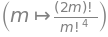

In [144]:
from sympy.abc import m
b = Lambda(m, factorial(2*m)/factorial(m)**4)
b

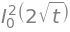

In [152]:
from sympy.abc import t
def B(t):
    k = symbols("k")
    return summation(
        (b(k)*t**k),
        (k,0,oo))

B(t)

Quindi la funione generatrice $B(t)=I_0^2(2\sqrt{t})$ genera la sequenza $b_n$:$$(b_n)_{n\in\mathbb{N}}=\left(\begin{array}{c}0\\0\end{array}\right),\left(\begin{array}{c}2\\1\end{array}\right),\left(\begin{array}{c}4\\2\end{array}\right),\left(\begin{array}{c}6\\3\end{array}\right),\left(\begin{array}{c}8\\4\end{array}\right),\;...$$Quindi la funzione composta $B(t)\circ t^2 = I_0^2(2t)$ rappresenta la versione *aerata* di $B(t)$, ovvero la funzione generatrice che genera i termini della sequenza $b_n$ alternandoli con degli 0.<br>Da questo si evince che:
$$\mathcal{G}\left(\sum_{k=0}^{n}\frac{(-1^kC_k(k+1))}{k!}\cdot\frac{C_{n-k}(n-k-1)}{(n-k)!}\right)=I_0^2(2t)$$$$\mathcal{G}\left(b_n\right)=I_0^2(2t)$$Dall'uguaglianza delle funzione generatrici, per il principio di identità, segue la tesi dell'espressione (3). L'espressione (4) segue dalla (3) applicando la proprietà di spostamento.

Dalle espressioni (3) e (4) si ottiene la (1) e da essa segue la (2) e dunque il teorema è dimostrato.

Si mostra numericamente l'uguaglianza $I_0^2(2t)=A(t)\cdot A(-t)=B(t^2)$ per alcuni valori interi determinati casualmente:

In [159]:
from sympy import besseli

for i in range (5):
    t = randint(1,25)
    print ("t={}\n\tA(t)*A(-t)=\t{}\n\tB(t^2)=\t\t{}\n".format(t,A(t)*A(-t),B(t**2)))

t=6
	A(t)*A(-t)=	besseli(0, 12)**2
	B(t^2)=		besseli(0, 12)**2

t=11
	A(t)*A(-t)=	besseli(0, 22)**2
	B(t^2)=		besseli(0, 22)**2

t=21
	A(t)*A(-t)=	besseli(0, 42)**2
	B(t^2)=		besseli(0, 42)**2

t=22
	A(t)*A(-t)=	besseli(0, 44)**2
	B(t^2)=		besseli(0, 44)**2

t=18
	A(t)*A(-t)=	besseli(0, 36)**2
	B(t^2)=		besseli(0, 36)**2

